In [1]:
conda install -c conda-forge wordcloud=1.8.1

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno
from wordcloud import WordCloud, STOPWORDS
import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


### Loading the Dataset

In [3]:
df= pd.read_csv("1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.shape

(34660, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


### Checking if the columns are continuous or categorical

In [7]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>10]
print('Continuous attributes are : {}'.format(Continuous_features))

Categorial_features = [feature for feature in df.columns if len(df[feature].unique())<10]
print('Categorial attributes are : {}'.format(Categorial_features))

Continuous attributes are : ['id', 'name', 'asins', 'categories', 'keys', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']
Categorial attributes are : ['brand', 'manufacturer', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.userCity', 'reviews.userProvince']


### Checking the null values in each column

In [8]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

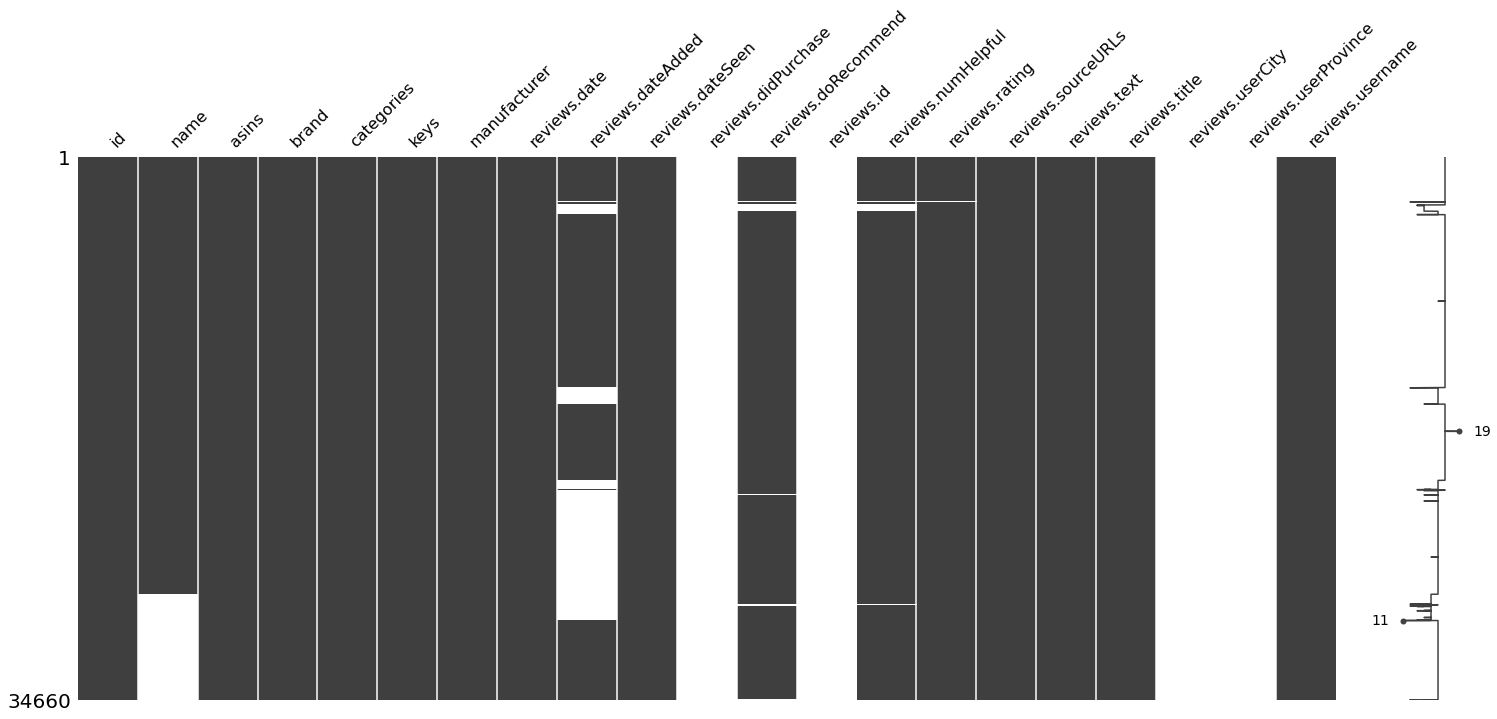

In [9]:
def missing(df):
    msgno.matrix(df)
    plt.show()
missing(df)

In [10]:
print(df.isna().mean().round(4) * 100)


id                        0.00
name                     19.50
asins                     0.01
brand                     0.00
categories                0.00
keys                      0.00
manufacturer              0.00
reviews.date              0.11
reviews.dateAdded        30.64
reviews.dateSeen          0.00
reviews.didPurchase     100.00
reviews.doRecommend       1.71
reviews.id              100.00
reviews.numHelpful        1.53
reviews.rating            0.10
reviews.sourceURLs        0.00
reviews.text              0.00
reviews.title             0.01
reviews.userCity        100.00
reviews.userProvince    100.00
reviews.username          0.01
dtype: float64


Here we can see that there are no values in reviews.didPurchase, reviews.id, reviews.userCity, reviews.userProvince columns of the dataset, so its better to remove it.

In [11]:
df.drop(['reviews.didPurchase', 'reviews.id', 'reviews.userCity','reviews.userProvince', 'reviews.dateAdded'], axis=1, inplace=True)

Since we have large dataset we can eliminate the null values.

In [12]:
df.dropna(inplace=True)

In [13]:
def countplot(x1,df,title):
    sns.set_style("dark")
    sns.countplot(x=x1, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title(title,fontsize = 20)
    plt.show() 

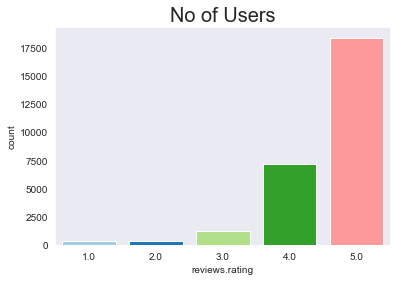

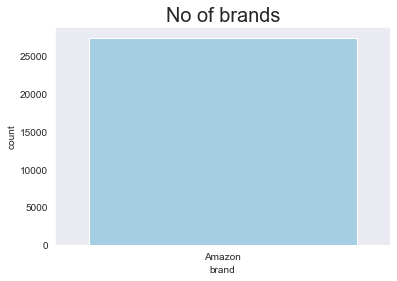

In [14]:
countplot('reviews.rating', df ,'No of Users' )
countplot('brand', df ,'No of brands' )

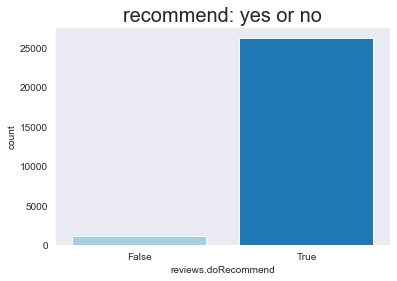

In [15]:
countplot('reviews.doRecommend',df,'recommend: yes or no')

### Sentiment Analysis

In [16]:
def convert_ratings(x):
    if x < 4:
        return 0
    if x >= 4:
        return 1
vect_func = np.vectorize(convert_ratings)
df['sentiments'] = df['reviews.rating'].map(vect_func)

### Checking if new sentiments column is added to the dataset where all the ratings that were less 4 are 0 and greater than 4 are allocated 1

In [17]:
df[df['reviews.rating']<4]

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sentiments
117,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-08T00:00:00.000Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",True,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't have some of the features I was looking...,Wasn't for me,Mark,0
126,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-10T00:00:00.000Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",False,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,Brandon,0
169,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-11-25T00:00:00.000Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:00:00.000Z",False,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tablet for my 4 year old daughte...,Ended up returning,Mijenx,0
222,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-30T00:00:00.000Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",False,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,I was hoping to use Google launcher with this ...,A cheap tablet,blargh22,0
226,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-03T00:00:00.000Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",False,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,AZ23b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-02T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,3.0,http://reviews.bestbuy.com/3545/5588528/review...,"Alexa can do basic things, hard to find tune s...",Learning curve,SqueakingTiger,0
27877,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-07-23T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",False,0.0,3.0,http://reviews.bestbuy.com/3545/5588528/review...,This is a neat product but did not fit my need...,Ok,Greg,0
27891,AVpfl8cLLJeJML43AE3S,Amazon Kindle Fire 5ft USB to Micro-USB Cable ...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-12T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,3.0,http://reviews.bestbuy.com/3545/5588528/review...,Good speaker but limited if you don't have a b...,Good speaker,dysfunctional,0
27894,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-17T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",False,0.0,3

In [18]:
df[df['reviews.rating']>=4]

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sentiments
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,1
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,1
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-12T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Just love it. Easy to set up and use. Tons of ...,My new robot,imabull2014,1
27895,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-16T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,This is my new favorite device. While not perf...,My new favorite product,JefferyP,1
27896,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-16T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,I got this to basically experiment with. Strai...,Lots of potential!!!,shelbydave,1
27897,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-15T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2

In [19]:
df.drop(df['reviews.rating'], inplace=True)


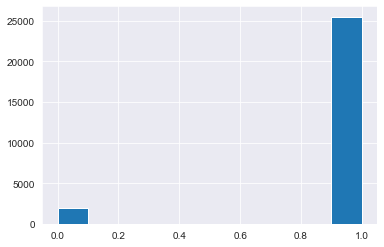

In [20]:
df.sentiments.hist();

Text(0.5, 1.0, 'Sentiments Distribution')

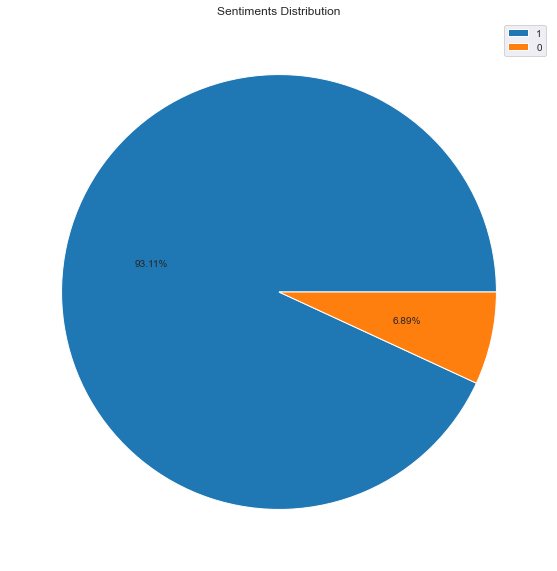

In [21]:
plt.figure(figsize= (10,10))
label=['1','0']
plt.pie(df['sentiments'].value_counts(), autopct='%0.2f%%')
plt.legend(label)
plt.title('Sentiments Distribution')

Now for Reviews.text column we need to check which words are used the maximum time.

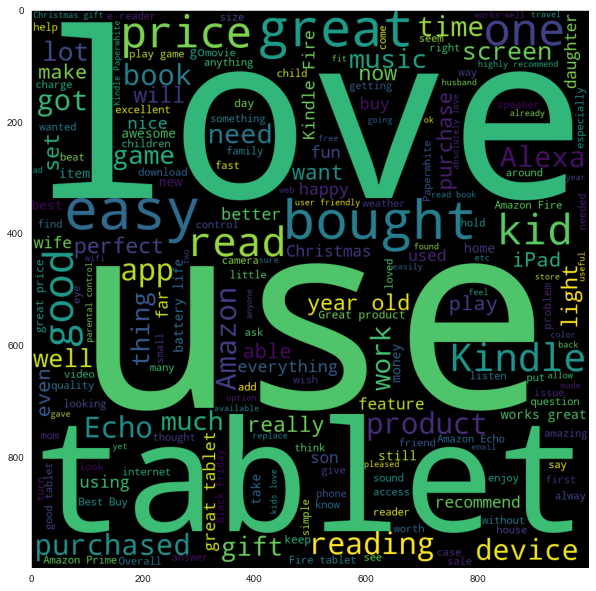

In [22]:
plt.figure(figsize=(10,12))
words_count = pd.Series((df['reviews.text']))
wordcloud = WordCloud(width=1000, height=1000).generate(' '.join(words_count))

plt.imshow(wordcloud)
plt.show()

In [23]:
#stop words are those words which are very basic & wont be of any for our prediction 
stopwords = set(STOPWORDS)
stop_words=list(stopwords)
print(stopwords)

{"i'll", 'each', "here's", 'herself', 'once', "she's", 'during', 'out', 'until', 'else', 'me', 'too', 'at', 'after', 'an', 'was', 'over', 'with', "he'd", 'ought', 'own', 'under', 'this', 'while', 'com', 'off', 'i', 'on', "i'm", 'is', 'then', 'we', 'about', 'it', 'since', "you've", 'above', 'again', "why's", 'these', "couldn't", "you'll", 'very', 'before', 'did', 'than', 'in', "where's", 'or', "wouldn't", 'where', "let's", 'so', 'her', 'can', "you're", 'have', 'had', 'when', 'here', 'k', 'as', "won't", 'could', 'otherwise', "don't", 'like', 'not', 'some', 'themselves', "that's", "there's", 'how', "they'd", 'does', 'further', 'those', "isn't", 'any', 'such', 'from', 'that', 'who', 'myself', 'against', 'do', "what's", 'also', "aren't", 'by', 'into', "they've", 'my', 'their', 'are', 'all', "shouldn't", "who's", "we've", 'hence', 'its', "we're", 'she', 'most', 'same', 'whom', 'cannot', "weren't", 'no', 'you', "she'll", "they'll", 'through', 'were', "haven't", "wasn't", 'ever', 'ourselves', 

In [24]:
import string
import nltk
nltk.download()
from nltk.corpus import stopwords
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

def filtertext(df):
    filtertext = []
    for i in df['reviews.text']:
        df_new = text_process(i)
        mystring = ' '.join([str(item) for item in df_new])
        filtertext.append(mystring)
    return filtertext

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [25]:
filtertext(df)

['product far disappointed children love use like ability monitor control content see ease',
 'Great ereading go nice light weight price point given definitely worth purchase',
 'gave Christmas gift inlaws husband uncle loved easy use fantastic features',
 'Great device read books like links borrowed library ebooks Switched another popular tablet brand happy choice made took time get books previous nonKindle reader finally figured way',
 'love ordering books reading reader',
 'easy elderly users cease ads pop',
 'Excellent product Easy use large screen makes watching movies reading easier',
 'Wanted father first tablet good value watch movies play games Easy enough use',
 'Simply everything need Thank youAnd silk works wonders',
 'Got present love size screen',
 'kindle easiest use graphics screen crisp clear brilliant colors',
 'nice reader almost perfect wantneed good bargain',
 'really like tablet would given 5 stars sometimes push start several times unlock screen little annoying',

In [26]:
df_copy= pd.DataFrame({'reviews_filtertext': filtertext(df)})
df_copy

,reviews_filtertext
0,product far disappointed children love use lik...
1,Great ereading go nice light weight price poin...
2,gave Christmas gift inlaws husband uncle loved...
3,Great device read books like links borrowed li...
4,love ordering books reading reader
...,...
27396,new favorite device perfect lot un useOne feat...
27397,got basically experiment Straight box really i...
27398,Good product basics bad buy specific light con...
27399,great connected home People use buy plan makin...


In [27]:
df['reviews_text']= filtertext(df)

In [28]:
df['reviews_text']

0        product far disappointed children love use lik...
6        Great ereading go nice light weight price poin...
7        gave Christmas gift inlaws husband uncle loved...
8        Great device read books like links borrowed li...
9                       love ordering books reading reader
                               ...                        
27895    new favorite device perfect lot un useOne feat...
27896    got basically experiment Straight box really i...
27897    Good product basics bad buy specific light con...
27898    great connected home People use buy plan makin...
27899    Cool product Amazon cool job Great audio quali...
Name: reviews_text, Length: 27401, dtype: object

### Count Vectorization

In [29]:
vectorizer = CountVectorizer(max_features=800)
vectorizer.fit(df['reviews_text'])
features= vectorizer.transform(df['reviews_text'])
features.toarray()

cv_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(cv_idf, df['sentiments'], test_size=0.4, random_state=42)

### XGBoost

In [30]:
xgb = XGBClassifier()
cv_results = cross_validate(xgb, X_train, y_train, cv=5)
print(cv_results['test_score'].mean())
xgb.fit(X_train, y_train)
result = xgb.predict(X_test)
accuracy = accuracy_score(y_test,result)
print(accuracy)

[22:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### XGBoost with Hyperparameter

In [31]:
xgb_h = XGBClassifier(learning_rate =0.01,n_estimators=800,max_depth=9,min_child_weight=1,gamma=0,subsample=0.8,
        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
cv_results_h = cross_validate(xgb_h, X_train, y_train, cv=5)
print(cv_results_h['test_score'].mean())
xgb_h.fit(X_train, y_train)
result_xgb_h = xgb_h.predict(X_test)
accuracy = accuracy_score(y_test,result)
print(accuracy)

[22:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cv_results_logreg = cross_validate(logreg, X_train, y_train, cv=10,scoring='accuracy')
print(cv_results_logreg['test_score'].mean())
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

0.9357055961070561


### KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 4)
cv_results_knn = cross_validate(model_knn, X_train, y_train, cv=5)
print(cv_results_knn['test_score'].mean())
model_knn.fit(X_train, y_train)
model_knn = model_knn.predict(X_test)


0.9229318734793187


### AdaBoost Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model_ada= AdaBoostClassifier()
cv_results_ada = cross_validate(model_ada, X_train, y_train, cv=5)
print(cv_results_ada['test_score'].mean())
model_ada.fit(X_train, y_train)
model_ada = model_ada.predict(X_test)

0.9332116788321168


### Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
model_gnb= GaussianNB()
cv_results_gnb = cross_validate(model_gnb, X_train, y_train, cv=6)
print(cv_results_gnb['test_score'].mean())
model_gnb.fit(X_train, y_train)
model_gnb = model_gnb.predict(X_test)

0.4227493917274939


### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_dtc= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
cv_results_dectree = cross_validate(model_dtc, X_train, y_train, cv=5)
print(cv_results_dectree['test_score'].mean())
model_dtc.fit(X_train, y_train)
model_dtc = model_dtc.predict(X_test)

0.9088199513381996


### Random Forest Algorithm

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
cv_results_rf = cross_validate(rf, X_train, y_train, cv=5)
print(cv_results_rf['test_score'].mean())
rf.fit(X_train, y_train)
rf = rf.predict(X_test)

0.9330900243309003


### TF_IDF Vectorization

In [38]:
vectorizer_tf = TfidfVectorizer()
vectorizer_tf.fit(df['reviews_text'])
features= vectorizer_tf.transform(df['reviews_text'])
features.toarray()

tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer_tf.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['sentiments'], test_size=0.2, random_state=42)

### Logistic Regression

In [39]:
logreg_tf = LogisticRegression()
results_logreg_tf = cross_validate(logreg_tf, X_train, y_train,scoring='accuracy')
print(results_logreg_tf['test_score'].mean())
logreg_tf.fit(X_train, y_train)
logreg_tf_predictions = logreg_tf.predict(X_test)

0.9366332116788321


### XGBoost

In [ ]:
xgb_tf = XGBClassifier()
results_tf = cross_validate(xgb, X_train, y_train)
print(results_tf['test_score'].mean())
xgb_tf.fit(X_train, y_train)
result = xgb_tf.predict(X_test)
accuracy = accuracy_score(y_test,result)
print(accuracy)

### AdaBoost Algorithm 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada_tf= AdaBoostClassifier()
results_ada_tf = cross_validate(model_ada, X_train, y_train, cv=5)
print(results_ada_tf['test_score'].mean())
model_ada_tf.fit(X_train, y_train)
model_ada_tf = model_ada_tf.predict(X_test)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtc_tf= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
results_dectree_tf = cross_validate(model_dtc_tf, X_train, y_train)
model_dtc_tf.fit(X_train, y_train)
model_dtc_tf = model_dtc_tf.predict(X_test)

In [ ]:
models = pd.DataFrame({
    'Model': ['XgBoost', 'XGboost with hyperparameter tuning', 'Logistic Regression', 
              'KNN classification', 'ADA Classifier', 'Gaussian Naive Bayes', 'Decision Tree classifier', 'Random forest algorithm'],
    'Score': [cv_results['test_score'].mean(),cv_results_h['test_score'].mean(),cv_results_logreg['test_score'].mean(),
             cv_results_knn['test_score'].mean(), cv_results_ada['test_score'].mean(),cv_results_gnb['test_score'].mean(),
             cv_results_dectree['test_score'].mean(),cv_results_rf['test_score'].mean()]})
models

In [ ]:
models_tf = pd.DataFrame({
    'Model': ['XgBoost', 'Logistic Regression', 
               'ADA Classifier', 'Decision Tree classifier'],
    'Score': [results_tf['test_score'].mean(),results_logreg_tf['test_score'].mean(),   
              results_ada_tf['test_score'].mean(),results_dectree_tf['test_score'].mean()
                         ]})
models_tf